### Imports

In [1]:
import numpy as np
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}

###

sim_colors = {}

custom = ['#990000','#d7301f','#ef6548','#fc8d59','#fdbb84','#fdd49e'] #yellow
for delta in [0.8, 0.6, 0.4, 0.2]:
    custom = []
    if delta == 0.2:
        custom = ['#4a1486', '#6a51a3','#807dba', '#9e9ac8','#bcbddc','#dadaeb'] #purple
    if delta == 0.4:
        custom = ['#034e7b','#0570b0','#3690c0','#74a9cf','#a6bddb','#b4c7e1'] #blue
    if delta == 0.6:
        custom = ['#005824', '#238b45','#41ae76','#66c2a4','#99d8c9','#ccece6'] #green
    if delta == 0.8:
        custom = ['#91003f', '#ce1256', '#e7298a','#df65b0','#c994c7','#d4b9da'] #pink
    
    sim_colors['wdm_3.0_%.1f'%delta] = custom[5]
    sim_colors['wdm_4.0_%.1f'%delta] = custom[4]
    sim_colors['wdm_5.0_%.1f'%delta] = custom[3]
    sim_colors['wdm_6.0_%.1f'%delta] = custom[2]
    sim_colors['wdm_6.5_%.1f'%delta] = custom[1]
    sim_colors['wdm_10.0_%.1f'%delta] = custom[0]

###

masses = {
              'wdm_3.0_0.2': 3., 'wdm_3.0_0.4': 3., 'wdm_3.0_0.6': 3., 'wdm_3.0_0.8': 3., 'wdm_3': 3., 
              'wdm_4.0_0.2': 4., 'wdm_4.0_0.4': 4., 'wdm_4.0_0.6': 4., 'wdm_4.0_0.8': 4., 'wdm_4': 4., 
              'wdm_5.0_0.2': 5., 'wdm_5.0_0.4': 5., 'wdm_5.0_0.6': 5., 'wdm_5.0_0.8': 5., 'wdm_5': 5., 
              'wdm_6.0_0.2': 6., 'wdm_6.0_0.4': 6., 'wdm_6.0_0.6': 6., 'wdm_6.0_0.8': 6., 'wdm_6': 6.,
              'wdm_6.5_0.2': 6.5, 'wdm_6.5_0.4': 6.5, 'wdm_6.5_0.6': 6.5, 'wdm_6.5_0.8': 6.5, 'wdm_6.5': 6.5, 
              'wdm_10.0_0.2': 10., 'wdm_10.0_0.4': 10., 'wdm_10.0_0.6': 10., 'wdm_10.0_0.8': 10., 'wdm_10': 10.
             }

In [2]:
base_mpeak = np.logspace(np.log10(3e5*300/0.7),np.log10(9e5*1.3e5/0.7),100)
x=0.5*(base_mpeak[1:]+base_mpeak[:-1])

def Mhm(mwdm):
    return 4.3e8 * (mwdm/3.)**(-3.564)

def f_fncdm(Mpeak,Mhm,alpha,beta,gamma,delta):
    return delta + (1.-delta)*(1.+(alpha*Mhm/Mpeak)**beta)**(-1.*gamma)

### Plot posterior

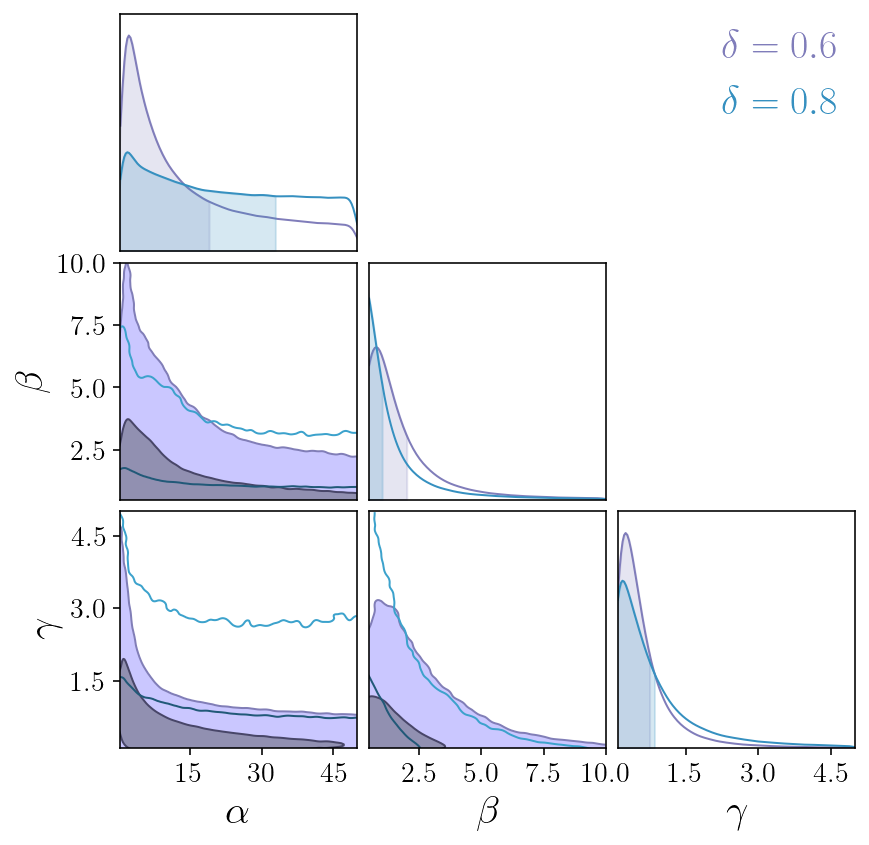

In [3]:
#Load these from Zenodo distribution: https://doi.org/10.5281/zenodo.14663119
samples_06 = np.loadtxt('df_wdm_0.6.txt')
samples_08 = np.loadtxt('df_wdm_0.8.txt')

###

c = ChainConsumer()
c.add_chain(samples_06, parameters=[r"$\alpha$",r"$\beta$",r"$\gamma$"],name=r"$\delta=0.6$")

c.add_chain(samples_08, parameters=[r"$\alpha$",r"$\beta$",r"$\gamma$"],name=r"$\delta=0.8$")
c.configure(colors=["#807dba","#3690c0"], shade=[True,False], bar_shade=True,spacing=1.0,
                diagonal_tick_labels=False, tick_font_size=14, label_font_size=20, sigma2d=False,max_ticks=4, 
                summary=[False,True],kde=False)
fig = c.plotter.plot(figsize=(6,6), extents=[[0.5,50],[0.5,10],[0.1,5]],display=True)

### Plot SHMF suppression

In [4]:
delta = 0.6

models = ['wdm_3.0_%.1f'%delta, 
          'wdm_4.0_%.1f'%delta,
          'wdm_5.0_%.1f'%delta, 
          'wdm_6.0_%.1f'%delta,
          'wdm_6.5_%.1f'%delta,
          'wdm_10.0_%.1f'%delta]

labels = {'wdm_3.0_%.1f'%delta: r'$k_{\mathrm{hm}}=22.8~\mathrm{Mpc}^{-1}$', 
          'wdm_4.0_%.1f'%delta: r'$k_{\mathrm{hm}}=32.1~\mathrm{Mpc}^{-1}$',
          'wdm_5.0_%.1f'%delta: r'$k_{\mathrm{hm}}=41.8~\mathrm{Mpc}^{-1}$', 
          'wdm_6.0_%.1f'%delta: r'$k_{\mathrm{hm}}=52.0~\mathrm{Mpc}^{-1}$',
          'wdm_6.5_%.1f'%delta: r'$k_{\mathrm{hm}}=57.1~\mathrm{Mpc}^{-1}$', 
          'wdm_10.0_%.1f'%delta: r'$k_{\mathrm{hm}}=95.3~\mathrm{Mpc}^{-1}$',
          'cdm':r'$\mathrm{CDM}$'}

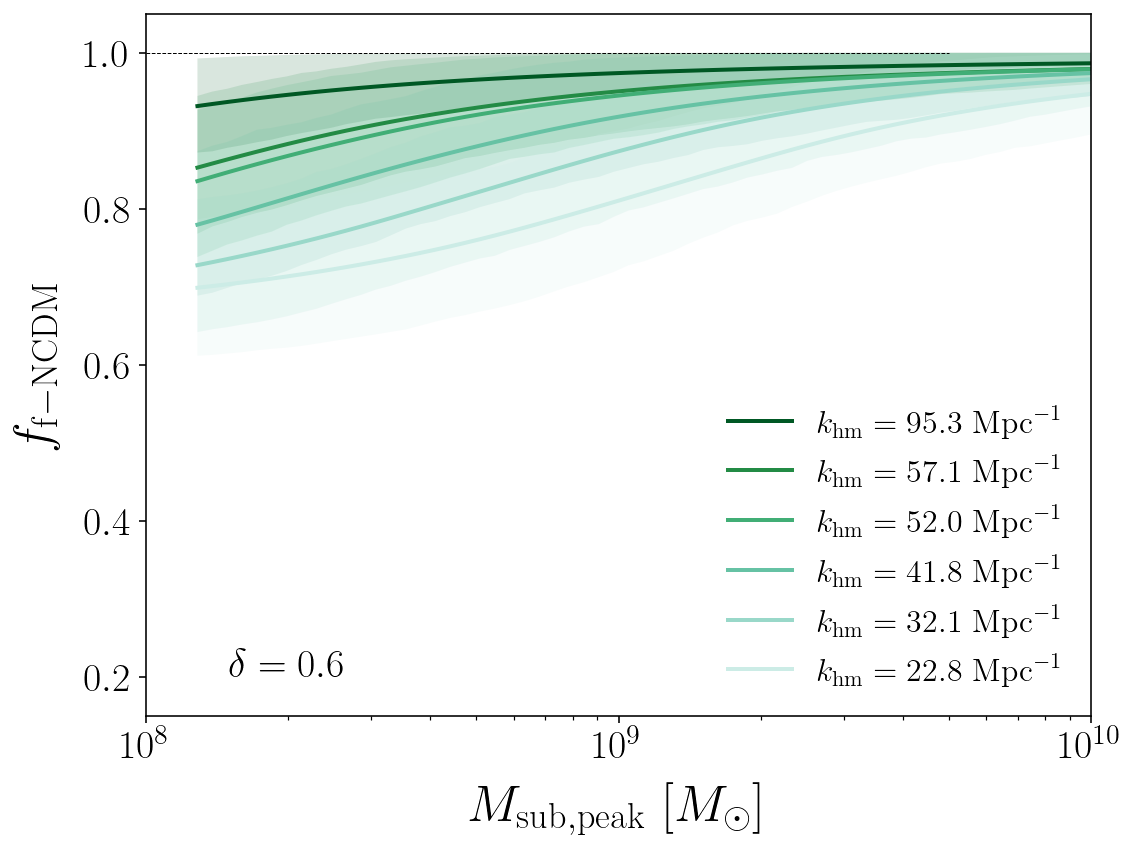

In [5]:
plt.figure(figsize=(8,6))
plt.xscale('log')

###
    
pred_dict = {}

wdm_plot = []
for model in models[::-1]:

    pred = []
    for rand_int in np.random.randint(samples_06.shape[0],size=500):
        pred.append(f_fncdm(x,Mhm(masses[model]),samples_06[rand_int,0],samples_06[rand_int,1],
                            samples_06[rand_int,2],delta))

            
    pred_dict[model] = np.mean(pred,axis=0)
    wdm_plot.append(plt.plot(base_mpeak[:-1],np.mean(pred,axis=0),c=sim_colors[model],label=labels[model],lw=2))
    
    plt.fill_between(base_mpeak[:-1],np.percentile(pred,16,axis=0),np.percentile(pred,84,axis=0),
                    alpha=0.15,facecolor=sim_colors[model])
            
        
###

plt.legend(handles=[wdm_plot[0][0],wdm_plot[1][0],wdm_plot[2][0],wdm_plot[3][0],wdm_plot[4][0],wdm_plot[5][0]],
           loc=4,fontsize=16,frameon=False,framealpha=1.0,ncol=1)
plt.plot(np.linspace(1e8,5e9,10),np.ones(10),'k--',lw=0.5)

###

plt.xlim(1e8,10**10)
plt.xticks([10**8,10**9,10**10],[r'$10^8$',r'$10^9$',r'$10^{10}$'], fontsize=20)
plt.ylim(0.15,1.05)
plt.yticks([0.2,0.4,0.6,0.8,1.0],[r'$0.2$',r'$0.4$',r'$0.6$',r'$0.8$',r'$1.0$'], fontsize=20)
plt.xlabel(r'$M_{\rm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=26,labelpad=8)
plt.ylabel(r'$f_{\mathrm{f-NCDM}}$', fontsize=26, labelpad=12)
plt.text(1.5e8, 0.2, r'$\delta=%.1f$'%delta, fontsize=20)

###

plt.tight_layout()
plt.show()

In [6]:
delta = 0.8

models = ['wdm_3.0_%.1f'%delta, 
          'wdm_4.0_%.1f'%delta,
          'wdm_5.0_%.1f'%delta, 
          'wdm_6.0_%.1f'%delta,
          'wdm_6.5_%.1f'%delta,
          'wdm_10.0_%.1f'%delta]

labels = {'wdm_3.0_%.1f'%delta: r'$k_{\mathrm{hm}}=22.8~\mathrm{Mpc}^{-1}$', 
          'wdm_4.0_%.1f'%delta: r'$k_{\mathrm{hm}}=32.1~\mathrm{Mpc}^{-1}$',
          'wdm_5.0_%.1f'%delta: r'$k_{\mathrm{hm}}=41.8~\mathrm{Mpc}^{-1}$', 
          'wdm_6.0_%.1f'%delta: r'$k_{\mathrm{hm}}=52.0~\mathrm{Mpc}^{-1}$',
          'wdm_6.5_%.1f'%delta: r'$k_{\mathrm{hm}}=57.1~\mathrm{Mpc}^{-1}$', 
          'wdm_10.0_%.1f'%delta: r'$k_{\mathrm{hm}}=95.3~\mathrm{Mpc}^{-1}$',
          'cdm':r'$\mathrm{CDM}$'}

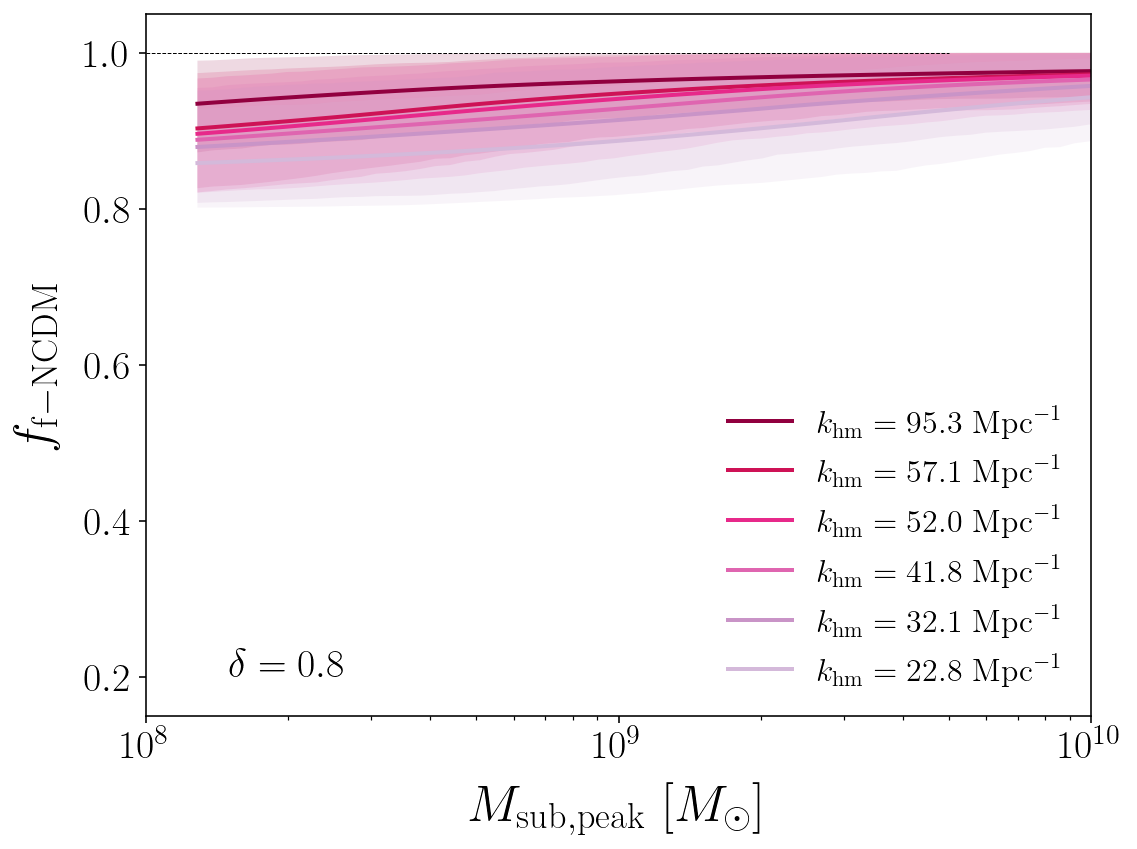

In [7]:
plt.figure(figsize=(8,6))
plt.xscale('log')

###
    
pred_dict = {}

wdm_plot = []
for model in models[::-1]:

    pred = []
    for rand_int in np.random.randint(samples_08.shape[0],size=500):
        pred.append(f_fncdm(x,Mhm(masses[model]),samples_08[rand_int,0],samples_08[rand_int,1],
                            samples_08[rand_int,2],delta))

            
    pred_dict[model] = np.mean(pred,axis=0)
    wdm_plot.append(plt.plot(base_mpeak[:-1],np.mean(pred,axis=0),c=sim_colors[model],label=labels[model],lw=2))
    
    plt.fill_between(base_mpeak[:-1],np.percentile(pred,16,axis=0),np.percentile(pred,84,axis=0),
                    alpha=0.15,facecolor=sim_colors[model])
            
        
###

plt.legend(handles=[wdm_plot[0][0],wdm_plot[1][0],wdm_plot[2][0],wdm_plot[3][0],wdm_plot[4][0],wdm_plot[5][0]],
           loc=4,fontsize=16,frameon=False,framealpha=1.0,ncol=1)
plt.plot(np.linspace(1e8,5e9,10),np.ones(10),'k--',lw=0.5)

###

plt.xlim(1e8,10**10)
plt.xticks([10**8,10**9,10**10],[r'$10^8$',r'$10^9$',r'$10^{10}$'], fontsize=20)
plt.ylim(0.15,1.05)
plt.yticks([0.2,0.4,0.6,0.8,1.0],[r'$0.2$',r'$0.4$',r'$0.6$',r'$0.8$',r'$1.0$'], fontsize=20)
plt.xlabel(r'$M_{\rm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=26,labelpad=8)
plt.ylabel(r'$f_{\mathrm{f-NCDM}}$', fontsize=26, labelpad=12)
plt.text(1.5e8, 0.2, r'$\delta=%.1f$'%delta, fontsize=20)

###

plt.tight_layout()
plt.show()